## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau




optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1,0.5,0.9]
redice_lr_patient = [5,10,25]



Instructions for updating:
Colocations handled automatically by placer.


In [11]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = (f"exp-{optim}_factor_{reduce_factor}_patient_{reduce_patient}")
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
b

50000/50000 [==============================] - 2s 50us/step - loss: 1.7813 - accuracy: 0.3845 - val_loss: 1.8112 - val_accuracy: 0.3660
Epoch 9/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.7542 - accuracy: 0.3927 - val_loss: 1.7901 - val_accuracy: 0.3730
Epoch 10/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.7305 - accuracy: 0.3991 - val_loss: 1.7745 - val_accuracy: 0.3841
Epoch 11/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.7084 - accuracy: 0.4049 - val_loss: 1.7612 - val_accuracy: 0.3891
Epoch 12/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.6883 - accuracy: 0.4123 - val_loss: 1.7507 - val_accuracy: 0.3939
Epoch 13/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.6703 - accuracy: 0.4187 - val_loss: 1.7411 - val_accuracy: 0.3988
Epoch 14/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.6544 - accuracy: 0.4246 - val_loss: 1.7321 

_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,742,474
Trainable params: 1,740,682
Non-trainable params: 1,

50000/50000 [==============================] - 3s 51us/step - loss: 1.6862 - accuracy: 0.4143 - val_loss: 1.7443 - val_accuracy: 0.3965
Epoch 14/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.6704 - accuracy: 0.4194 - val_loss: 1.7376 - val_accuracy: 0.3984
Epoch 15/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.6549 - accuracy: 0.4249 - val_loss: 1.7276 - val_accuracy: 0.4002
Epoch 16/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.6397 - accuracy: 0.4296 - val_loss: 1.7189 - val_accuracy: 0.4054
Epoch 17/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.6270 - accuracy: 0.4339 - val_loss: 1.7116 - val_accuracy: 0.4066
Epoch 18/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.6143 - accuracy: 0.4377 - val_loss: 1.7047 - val_accuracy: 0.4104
Epoch 19/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.6021 - accuracy: 0.4420 - val_loss: 1.6962

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.6557 - accuracy: 0.1660 - val_loss: 2.2347 - val_accuracy: 0.1720
Epoch 2/25
50000/50000 [==============================] - 3s 50us/step - loss: 2.2332 - accuracy: 0.2556 - val_loss: 2.1549 - val_accuracy: 0.2268
Epoch 3/25
50000/50000 [==============================] - 3s 50us/step - loss: 2.0752 - accuracy: 0.2953 - val_loss: 2.0973 - val_accuracy: 0.2508
Epoch 4/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.9825 - accuracy: 0.3203 - val_loss: 2.0294 - val_accuracy: 0.2783
Epoch 5/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.9200 - accuracy: 0.3382 - val_loss: 1.9668 - val_accuracy: 0.3018
Epoch 6/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.8723 - accuracy: 0.3531 - val_loss: 1.9083 - val_accuracy: 0.3240
Epoch 7/25
50000/50000 [==============================] - 3s 50us/st

Epoch 21/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.5698 - accuracy: 0.4539 - val_loss: 1.6847 - val_accuracy: 0.4175
Epoch 22/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.5596 - accuracy: 0.4564 - val_loss: 1.6781 - val_accuracy: 0.4173
Epoch 23/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.5492 - accuracy: 0.4601 - val_loss: 1.6731 - val_accuracy: 0.4215
Epoch 24/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.5389 - accuracy: 0.4648 - val_loss: 1.6666 - val_accuracy: 0.4216
Epoch 25/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.5307 - accuracy: 0.4674 - val_loss: 1.6614 - val_accuracy: 0.4270
Numbers of exp: 8, reduce_factor: 0.90, reduce_patient: 25
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)           

Epoch 6/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.1898 - accuracy: 0.5824 - val_loss: 1.8839 - val_accuracy: 0.3461
Epoch 7/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.1418 - accuracy: 0.5993 - val_loss: 1.8454 - val_accuracy: 0.3492
Epoch 8/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.0911 - accuracy: 0.6141 - val_loss: 1.9466 - val_accuracy: 0.3658

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 9/25
50000/50000 [==============================] - 3s 51us/step - loss: 0.9764 - accuracy: 0.6641 - val_loss: 1.5310 - val_accuracy: 0.4663
Epoch 10/25
50000/50000 [==============================] - 3s 51us/step - loss: 0.9245 - accuracy: 0.6852 - val_loss: 1.4184 - val_accuracy: 0.5032
Epoch 11/25
50000/50000 [==============================] - 3s 51us/step - loss: 0.9018 - accuracy: 0.6937 - val_loss: 1.3609 - val_accuracy: 0.5260
Epoch 12/25
50000/50000 [=========

50000/50000 [==============================] - 3s 52us/step - loss: 1.8981 - accuracy: 0.3491 - val_loss: 1.9522 - val_accuracy: 0.3333
Epoch 25/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.8896 - accuracy: 0.3517 - val_loss: 1.9447 - val_accuracy: 0.3343
Numbers of exp: 11, reduce_factor: 0.10, reduce_patient: 25
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_34 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________

Epoch 9/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.1247 - accuracy: 0.2870 - val_loss: 2.0873 - val_accuracy: 0.2842
Epoch 10/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.1013 - accuracy: 0.2941 - val_loss: 2.0797 - val_accuracy: 0.2927
Epoch 11/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0801 - accuracy: 0.2994 - val_loss: 2.0737 - val_accuracy: 0.2974
Epoch 12/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0611 - accuracy: 0.3045 - val_loss: 2.0695 - val_accuracy: 0.3016
Epoch 13/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0444 - accuracy: 0.3102 - val_loss: 2.0648 - val_accuracy: 0.3076
Epoch 14/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0293 - accuracy: 0.3148 - val_loss: 2.0607 - val_accuracy: 0.3100
Epoch 15/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0152 - accuracy: 0.3175 - val_l

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 73us/step - loss: 2.7325 - accuracy: 0.1435 - val_loss: 2.2624 - val_accuracy: 0.1291
Epoch 2/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.4145 - accuracy: 0.2109 - val_loss: 2.1969 - val_accuracy: 0.1936
Epoch 3/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.2893 - accuracy: 0.2425 - val_loss: 2.1380 - val_accuracy: 0.2352
Epoch 4/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.2130 - accuracy: 0.2628 - val_loss: 2.0902 - val_accuracy: 0.2617
Epoch 5/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.1582 - accuracy: 0.2782 - val_loss: 2.0529 - val_accuracy: 0.2794
Epoch 6/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.1165 - accuracy: 0.2885 - val_loss: 2.0241 - val_accuracy: 0.2935
Epoch 7/25
50000/50000 [==============================] - 3s 52us/st

Epoch 21/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.8807 - accuracy: 0.3537 - val_loss: 1.9343 - val_accuracy: 0.3372
Epoch 22/25
50000/50000 [==============================] - 3s 50us/step - loss: 1.8730 - accuracy: 0.3565 - val_loss: 1.9273 - val_accuracy: 0.3387
Epoch 23/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.8646 - accuracy: 0.3593 - val_loss: 1.9205 - val_accuracy: 0.3421
Epoch 24/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.8573 - accuracy: 0.3616 - val_loss: 1.9144 - val_accuracy: 0.3439
Epoch 25/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.8489 - accuracy: 0.3632 - val_loss: 1.9080 - val_accuracy: 0.3458
Numbers of exp: 16, reduce_factor: 0.90, reduce_patient: 10
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)         

Epoch 6/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.1358 - accuracy: 0.2793 - val_loss: 2.0350 - val_accuracy: 0.2714
Epoch 7/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.1018 - accuracy: 0.2892 - val_loss: 2.0135 - val_accuracy: 0.2844
Epoch 8/25
50000/50000 [==============================] - 3s 50us/step - loss: 2.0739 - accuracy: 0.2970 - val_loss: 1.9994 - val_accuracy: 0.2948
Epoch 9/25
50000/50000 [==============================] - 3s 51us/step - loss: 2.0480 - accuracy: 0.3051 - val_loss: 1.9907 - val_accuracy: 0.3042
Epoch 10/25
50000/50000 [==============================] - 3s 51us/step - loss: 2.0260 - accuracy: 0.3112 - val_loss: 1.9850 - val_accuracy: 0.3120
Epoch 11/25
50000/50000 [==============================] - 3s 51us/step - loss: 2.0064 - accuracy: 0.3171 - val_loss: 1.9799 - val_accuracy: 0.3177
Epoch 12/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.9892 - accuracy: 0.3207 - val_loss

50000/50000 [==============================] - 3s 51us/step - loss: 0.7346 - accuracy: 0.7553 - val_loss: 1.3096 - val_accuracy: 0.5472
Numbers of exp: 19, reduce_factor: 0.10, reduce_patient: 10
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_58 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_59 (Batc (None, 256)               1024      
____________________________________________________________

Epoch 10/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.6336 - accuracy: 0.4331 - val_loss: 1.7056 - val_accuracy: 0.3961
Epoch 11/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.6096 - accuracy: 0.4407 - val_loss: 1.6863 - val_accuracy: 0.4080
Epoch 12/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5869 - accuracy: 0.4493 - val_loss: 1.6747 - val_accuracy: 0.4143
Epoch 13/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5646 - accuracy: 0.4556 - val_loss: 1.6651 - val_accuracy: 0.4169
Epoch 14/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5455 - accuracy: 0.4617 - val_loss: 1.6474 - val_accuracy: 0.4202
Epoch 15/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5274 - accuracy: 0.4672 - val_loss: 1.6450 - val_accuracy: 0.4236
Epoch 16/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5103 - accuracy: 0.4749 - val_

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 81us/step - loss: 2.5991 - accuracy: 0.1715 - val_loss: 2.2293 - val_accuracy: 0.1864
Epoch 2/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.2053 - accuracy: 0.2623 - val_loss: 2.1515 - val_accuracy: 0.2315
Epoch 3/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.0345 - accuracy: 0.3102 - val_loss: 2.0568 - val_accuracy: 0.2667
Epoch 4/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.9305 - accuracy: 0.3380 - val_loss: 1.9638 - val_accuracy: 0.2992
Epoch 5/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.8551 - accuracy: 0.3603 - val_loss: 1.9008 - val_accuracy: 0.3282
Epoch 6/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.7980 - accuracy: 0.3789 - val_loss: 1.8385 - val_accuracy: 0.3495
Epoch 7/25
50000/50000 [==============================] - 3s 54us/st

Epoch 21/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.4421 - accuracy: 0.5026 - val_loss: 1.6148 - val_accuracy: 0.4444
Epoch 22/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.4295 - accuracy: 0.5067 - val_loss: 1.6061 - val_accuracy: 0.4462
Epoch 23/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.4181 - accuracy: 0.5092 - val_loss: 1.6008 - val_accuracy: 0.4509
Epoch 24/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.4059 - accuracy: 0.5158 - val_loss: 1.5967 - val_accuracy: 0.4515
Epoch 25/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.3947 - accuracy: 0.5193 - val_loss: 1.5911 - val_accuracy: 0.4533
Numbers of exp: 24, reduce_factor: 0.90, reduce_patient: 5
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3072)          

Epoch 6/25
50000/50000 [==============================] - 3s 51us/step - loss: 1.7965 - accuracy: 0.3786 - val_loss: 1.8459 - val_accuracy: 0.3475
Epoch 7/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.7508 - accuracy: 0.3944 - val_loss: 1.7975 - val_accuracy: 0.3720
Epoch 8/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.7129 - accuracy: 0.4071 - val_loss: 1.7692 - val_accuracy: 0.3816
Epoch 9/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.6792 - accuracy: 0.4176 - val_loss: 1.7412 - val_accuracy: 0.3890
Epoch 10/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.6518 - accuracy: 0.4270 - val_loss: 1.7303 - val_accuracy: 0.3968
Epoch 11/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.6259 - accuracy: 0.4359 - val_loss: 1.7131 - val_accuracy: 0.4064
Epoch 12/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.6019 - accuracy: 0.4450 - val_loss

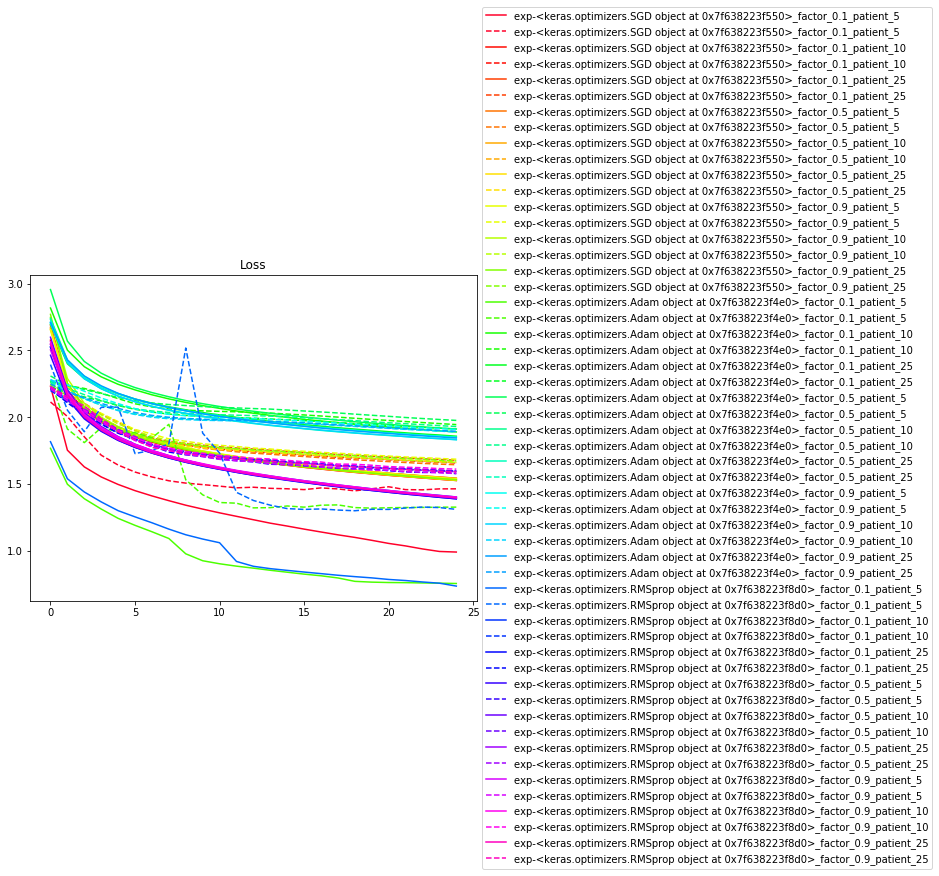

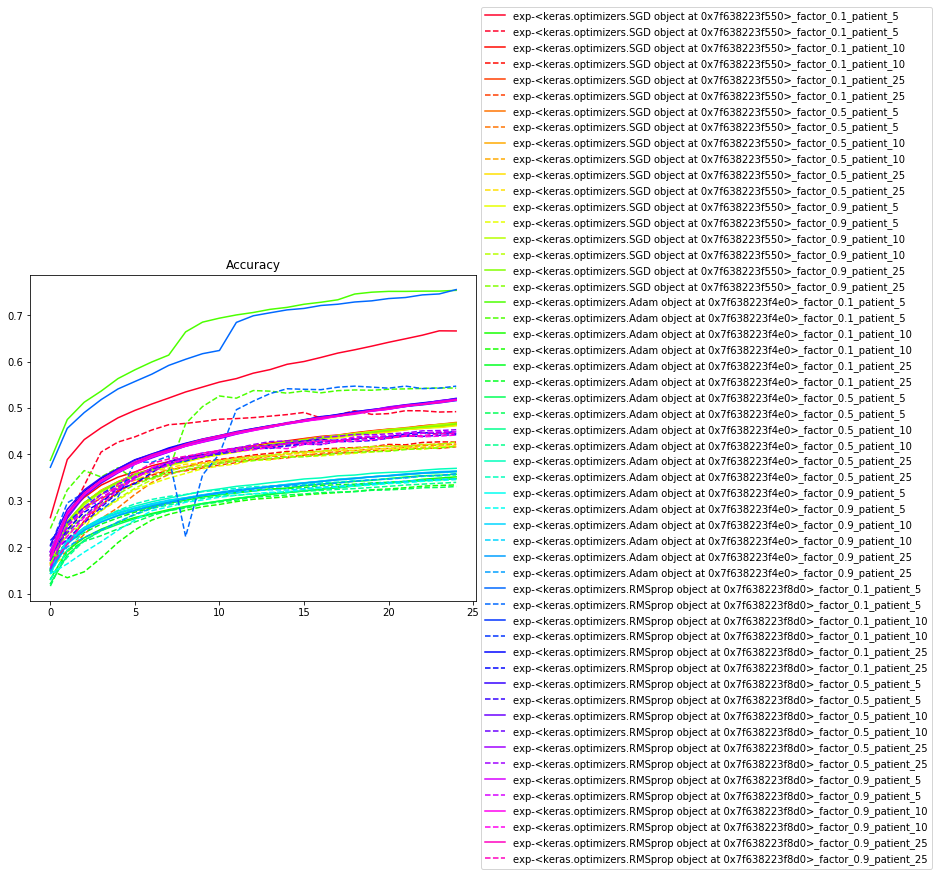

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()